<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start


In [193]:
!pip install -q yfinance
!pip install -q hurst
!pip install -q nolds

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import hurst
from nolds import corr_dim, hurst_rs
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, Normalizer

Generowanie danych


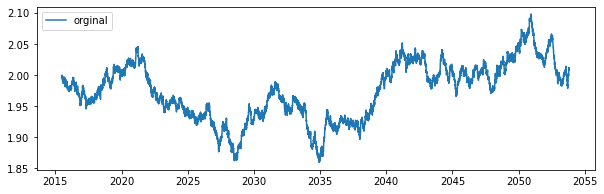

In [195]:
N = 9999
scalar = 10

t = pd.date_range('2015-07-01', periods=N, freq=BDay())

random_changes = 1. + np.random.randn(N) / 1000.
raw_x = np.cumprod(random_changes)*2  # create a random walk from random changes
x = pd.Series(raw_x, index=t)

# pp = hurst.compute_Hc(x, kind='price', simplified=True)

plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

# print(pp[0])

# Zad 1
Wersja biblioteczna

In [196]:
x.describe()

count    9999.000000
mean        1.974040
std         0.046427
min         1.859465
25%         1.938219
50%         1.978000
75%         2.010090
max         2.098147
dtype: float64

In [197]:
print(kurtosis(x))

-0.6334334518716007


# Zad 2

In [198]:
E = entropy(x)
print(E)

9.209963467776898


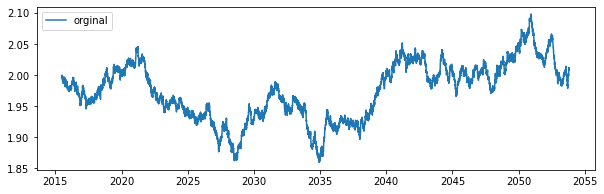

In [199]:
plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

In [200]:
print(hurst.compute_Hc(x)[0])

0.4957754412321257


In [201]:
print(corr_dim(x, 1))

0.9715359793924834


# Zad 3


In [202]:
# Szerokosc okna 
h = 100

Dla zadania 1


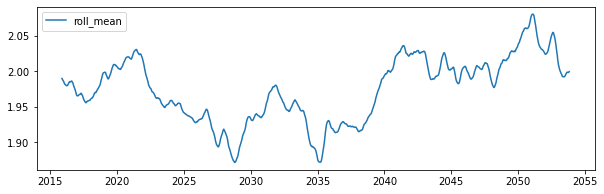

In [203]:
roll_mean = x.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

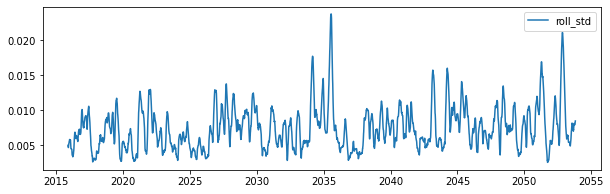

In [204]:
roll_std = x.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

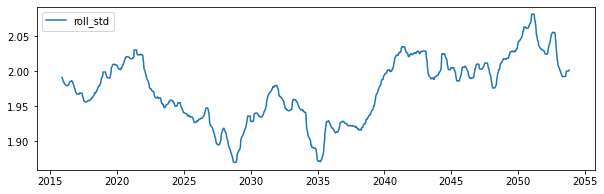

In [205]:
roll_median = x.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

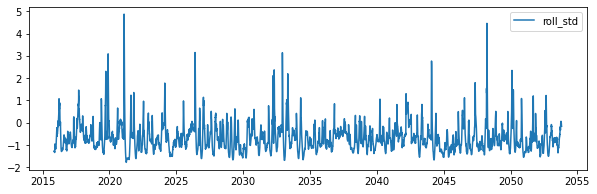

In [206]:
roll_kurtosis = x.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

Do zadania 2

In [207]:
def entopy_base_2(data):
    return entropy(data)

In [208]:
def first_hurst(data):
    return hurst.compute_Hc(data)[0]

In [209]:
def fractal_dim(data):
    return corr_dim(data, 1)

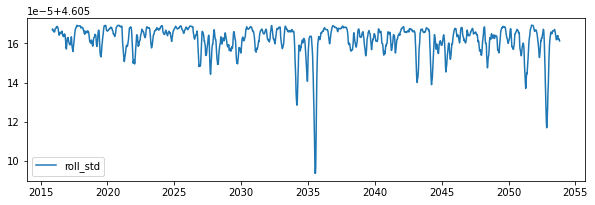

In [210]:
roll_entropy = x.rolling(h).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

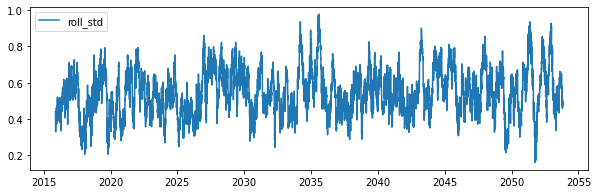

In [211]:
roll_hurst = x.rolling(h).apply(first_hurst)

plt.figure(figsize=(10,3))
plt.plot(t, roll_hurst, label='roll_std')
plt.legend()
plt.show()

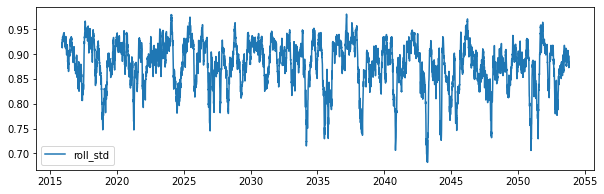

In [212]:
roll_fractal = x.rolling(h).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()

# Zad 4

Normalized


[[1.00000000e+00 0.00000000e+00]
 [8.94418362e-01 4.47231253e-01]
 [7.06674394e-01 7.07538904e-01]
 ...
 [2.00913617e-04 9.99999980e-01]
 [2.01017928e-04 9.99999980e-01]
 [2.00986256e-04 9.99999980e-01]]


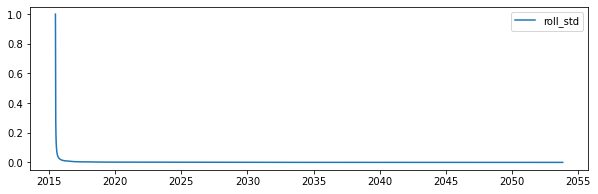

In [226]:
# FIXME: Normalizacja działa za mocno i wszystko dąży do 0

# print(raw_x.shape)
dump_feature = np.arange(N).reshape(-1, 1)
raw_x = raw_x.reshape(-1, 1)
x_stack = np.column_stack((raw_x, dump_feature))
# normalized = normalize(raw_x, norm='l2')
normalized = normalize(x_stack, norm='l2')

# print(normalized)
# print(raw_x)
print(normalized)
plt.figure(figsize=(10,3))
plt.plot(t, normalized[:, 0], label='roll_std')
plt.legend()
plt.show()

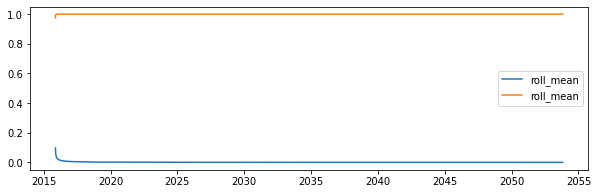

In [214]:
normalized = pd.DataFrame(normalized)

roll_mean = normalized.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

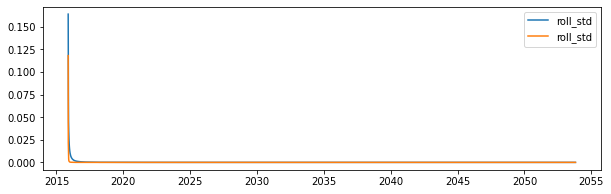

In [215]:
roll_std = normalized.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

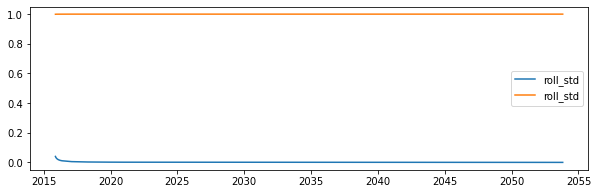

In [216]:
roll_median = normalized.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

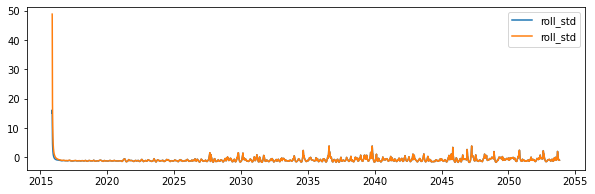

In [217]:
roll_kurtosis = normalized.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

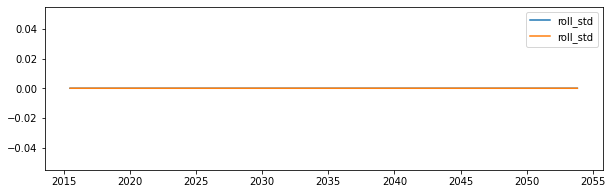

In [218]:
roll_entropy = normalized.rolling(1).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

Stand


In [219]:
scaler = StandardScaler()
raw_x = raw_x.reshape(-1, 1)
stand = scaler.fit_transform(raw_x)

stand = pd.DataFrame(stand)

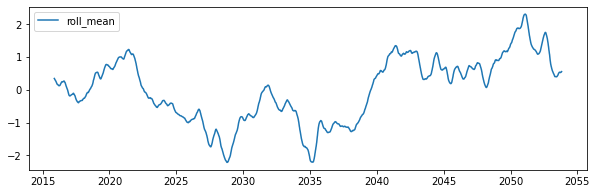

In [220]:
roll_mean = stand.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

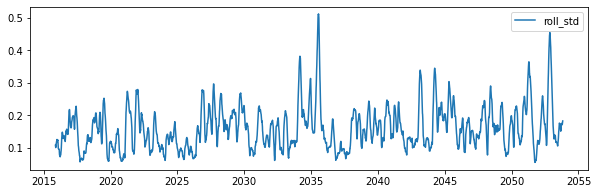

In [221]:
roll_std = stand.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

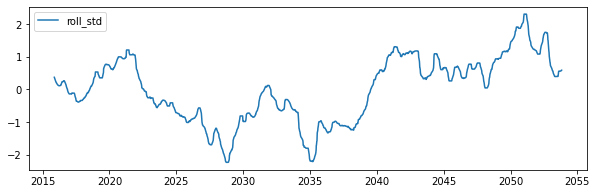

In [222]:
roll_median = stand.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

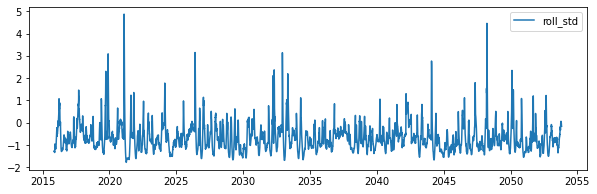

In [223]:
roll_kurtosis = stand.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

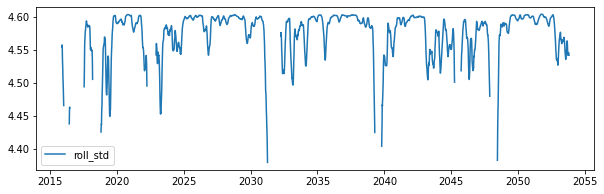

False


In [224]:
roll_entropy = stand.rolling(h).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

print(pd.DataFrame(stand).isnull().values.any())
# from IPython.display import display, HTML
# display(pd.DataFrame(stand)[6000:700])


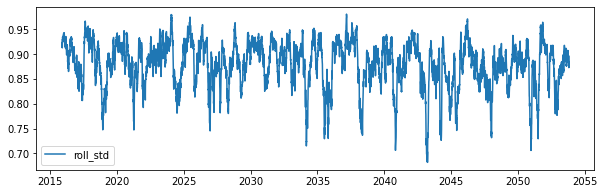

In [225]:
roll_fractal = stand.rolling(h).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()